# Projeto - Marketing Analytics
### Segmentando clientes de um Food Delivery

   Neste projeto iremos utilizar Data Science para segmentarmos os clientes de um food delivery. O objetivo é descobrir padrões de consumo dos clientes, localidade e produtos mais vendidos.
    Sabe-se que baseados em características comuns, é possível dividir os clientes em grupo. Utilizaremos de ferramentas de visualização de dados para melhor compreendermos os padrões e características dos dados, afim de segmentar os clientes utilizando o algoritmo K-means.
    A área de estudo deste projeto é o Marketing Analytics, e as ferramentas de Ciência de dados possibilitam para área de marketing compreender e avaliar o sucesso de suas campanhas. 
    Com o Marketing Analytics é possível responder perguntas tais como: "Qual o perfil dos nossos clientes?", "Consigo segmentar meus clientes por similaridade?", "Como estão as nossas iniciativas de marketing hoje?".
    Ao fim deste projeto teremos insights capazes de possibilitar a criação de campanhas específicas de marketing de acordo com o perfil de cada grupo.


### Carregando os Pacotes

In [1]:
# Manipulação e visualização de dados.
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning.
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Formatação dos gráficos.
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

### Carregando e Compreendendo os Dados


In [2]:
# Carregando o dataset.
df_food_delivery = pd.read_csv("dados/dataset.csv", encoding ='utf-8')

In [3]:
# Shape do dataset.
df_food_delivery.shape

(260645, 7)

In [4]:
# Cinco primeiras linhas do dataset.
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


### Análise Exploratória dos dados

In [5]:
# Total de valores únicos por coluna.
df_food_delivery.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [6]:
# Mostra os tipos de dados
df_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [7]:
# Resumo das colunas numéricas
df_food_delivery. describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [48]:
# Lista para receber o total de pedidos.
total_pedidos = []

In [49]:
# Loop para criar a tabela pivot totalizando os itens por transação
# Extraímos cada id e cada grupo do 'group by' por id_transacao
for k, group in df_food_delivery.groupby('id_transacao'):
    
    # Extraímos cada id e cada grupo do group by por horario_pedido
    for m, n in group.groupby('horario_pedido'):
        
        # Extraímos cada item de cada grupo
        id_transacao = k
        horario_pedido = m
        localidade = n['localidade'].values.tolist()[0]
        bebida = 0
        pizza = 0
        sobremesa = 0
        salada = 0
        n = n.reset_index(drop = True)
        
        # E então contabilizamos os itens pedidos
        for i in range(len(n)):
            item = n.loc[i, 'nome_item']
            num = n.loc[i, 'quantidade_item']
            
            if item == 'bebida':
                bebida = bebida + num
            
            elif item == 'pizza':
                pizza = pizza + num
            
            elif item == 'sobremesa':
                sobremesa = sobremesa + num
            
            elif item == 'salada':
                salada = salada + num
        
        output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada]
        total_pedidos.append(output)
        


Agrupamento concluído!


In [50]:
# Lista covertida em dataframe.
df_item_pedidos = pd.DataFrame(total_pedidos)

In [51]:
# Ajuste nos nomes das colunas.
df_item_pedidos.columns = ['id_transacao', 'horario_pedido', 'localidade', 'bebida', 'pizza', 'sobremesa', 'salada']

In [52]:
# Shape.
df_item_pedidos.shape

(100000, 7)

In [53]:
# Total de valores únicos por coluna.
df_item_pedidos.nunique()

id_transacao      100000
horario_pedido     76799
localidade             9
bebida                 6
pizza                  6
sobremesa              5
salada                 6
dtype: int64

In [54]:
# Dados originais.
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [55]:
# Resultado do pivot.
df_item_pedidos.head(10)

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0
5,0x1002af,2019-12-28 17:25:00,9,3,3,4,1
6,0x10034c,2019-03-12 18:17:00,5,3,4,4,0
7,0x100378,2019-10-13 18:44:00,4,4,4,5,1
8,0x100391,2019-10-10 18:07:00,5,4,4,4,0
9,0x1003a9,2019-06-23 00:39:00,6,0,2,2,0


### Maneira mais fácil de criar a tabela pivot

In [8]:
# Vamos criar uma tabela pivot que nos fornecerá o número de vezes cada item foi solicitado em cada pedido.
df_pivot = df_food_delivery.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [9]:
# Vamos visualizar as cinco primeiras linhas do novo dataframe.
df_pivot.head()

nome_item,bebida,pizza,salada,sobremesa
id_transacao,,,,
0x10000a,NaN,1.0,NaN,1.0
0x100058,NaN,2.0,NaN,2.0
0x1000c8,4.0,4.0,1.0,5.0
0x10014c,NaN,1.0,NaN,1.0
0x1001d8,3.0,3.0,NaN,3.0


In [10]:
# Substituindo possíveis valores NA gerados no pivot por 0, além de transformar o índice em coluna.
df_pivot = df_pivot.fillna(0).reset_index()

In [11]:
# Tipo de cada objeto.
type(df_pivot)

pandas.core.frame.DataFrame

In [12]:
# Tipos de dados nas colunas.
df_pivot.dtypes

nome_item
id_transacao     object
bebida          float64
pizza           float64
salada          float64
sobremesa       float64
dtype: object

In [13]:
# Verificando quantos valores únicos possui cada coluna.
df_pivot.nunique()

nome_item
id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
dtype: int64

In [14]:
# Parâmetros estatísticos de cada uma das colunas.
df_pivot.describe()

nome_item,bebida,pizza,salada,sobremesa
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,0.711370,2.569210
std,1.627886,1.588589,1.086524,1.332084
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000
75%,3.000000,3.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [15]:
# Verificando se há valores nulos.
df_pivot.isnull().sum()

nome_item
id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
dtype: int64

In [16]:
# Vamos incluir a coluna localidade e para fazer o merge precisamos de uma coluna em comum entre os dois dataframes, nesse caso, id_transacao
df_pivot2 = df_pivot.merge(df_food_delivery[['id_transacao', 'localidade']])

In [17]:
# Visualizando os dados.
df_pivot2.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9


In [18]:
# Shape.
df_pivot2.nunique()

id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
localidade           9
dtype: int64

In [56]:
# Visualiza os dados.
df_item_pedidos.head(3)

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1


In [57]:
# Extraímos o mês da coluna horario_pedido e gravamos em uma nova coluna
df_item_pedidos['mes'] = df_item_pedidos['horario_pedido'].apply(lambda x: time.strftime("%m", time.strptime(x,"%Y-%m-%d %H:%M:%S")))


In [58]:
# Visualiza o resultado.
df_item_pedidos.head(10)

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada,mes
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06
5,0x1002af,2019-12-28 17:25:00,9,3,3,4,1,12
6,0x10034c,2019-03-12 18:17:00,5,3,4,4,0,03
7,0x100378,2019-10-13 18:44:00,4,4,4,5,1,10
8,0x100391,2019-10-10 18:07:00,5,4,4,4,0,10
9,0x1003a9,2019-06-23 00:39:00,6,0,2,2,0,06


In [59]:
# Vamos incluir a coluna localidade e para fazer o merge precisamos de uma coluna em comum, nesse caso, id_transacao
df_pivot = df_pivot.merge(df_item_pedidos[['id_transacao', 'mes']])

In [60]:
# Visualiza o resultado.
df_pivot.head(10)

,id_transacao,bebida,pizza,salada,sobremesa,mes
0,0x10000a,0.0,1.0,0.0,1.0,01
1,0x100058,0.0,2.0,0.0,2.0,05
2,0x1000c8,4.0,4.0,1.0,5.0,01
3,0x10014c,0.0,1.0,0.0,1.0,02
4,0x1001d8,3.0,3.0,0.0,3.0,06
5,0x1002af,3.0,3.0,1.0,4.0,12
6,0x10034c,3.0,4.0,0.0,4.0,03
7,0x100378,4.0,4.0,1.0,5.0,10
8,0x100391,4.0,4.0,0.0,4.0,10
9,0x1003a9,0.0,2.0,0.0,2.0,06


In [61]:
# Visualiza valores únicos.
df_pivot.nunique()

id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
mes                 12
dtype: int64

### Ajuste de índices

In [62]:
# Para segmentar os pedidos dos clientes, precisamos de uma coluna de identificação de cada registro.
# Não podemos usar id_transacao, pois essa coluna representa um dado válido e além disso não é um valor único,
#logo não pode ser usado como índice.
df_item_pedidos_idx = df_item_pedidos.reset_index()

In [63]:
# Agora temos uma coluna de ID com valor único para cada registro.
df_item_pedidos_idx.head()

,index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada,mes
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06


In [64]:
# Dataset.
df_item_pedidos

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada,mes
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06
...,...,...,...,...,...,...,...,...
99995,0xffe96,2019-01-05 19:28:00,4,4,4,4,0,01
99996,0xffeed,2019-08-08 00:42:00,2,0,1,1,0,08
99997,0xfff07,2019-05-04 00:48:00,2,1,1,1,0,05
99998,0xfff4d,2019-07-18 00:17:00,3,0,2,2,0,07


### Visualização dos dados

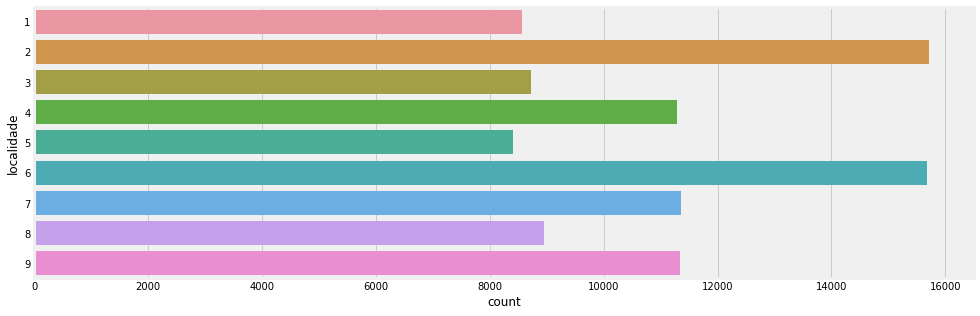

In [65]:
# Plot da quantidade de pedidos por localidade.
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'localidade' , data = df_item_pedidos)
plt.show()

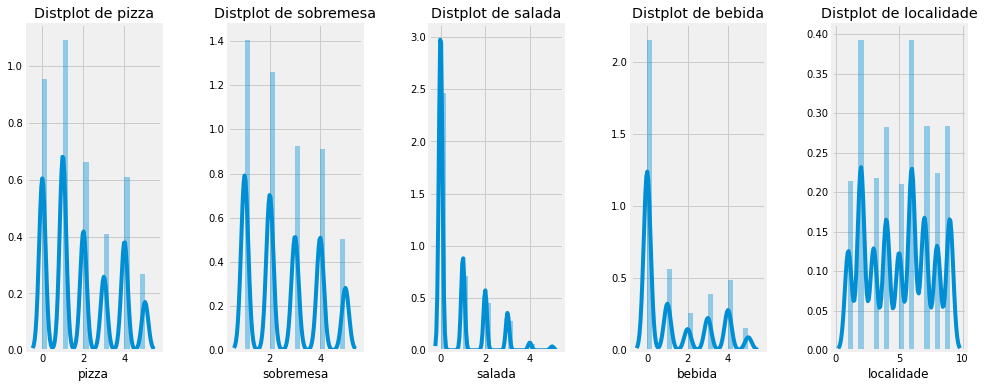

In [66]:
# Distplot dos atributos usados para segmentação.

# Tamanho da figura
plt.figure(1 , figsize = (15 , 6))

# Inicializa o contador
n = 0 

# Loop pelas colunas
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida', 'localidade']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_item_pedidos[x] , bins = 20)
    plt.title('Distplot de {}'.format(x))
plt.show()

### Regplot dos atributos usados para segmentação

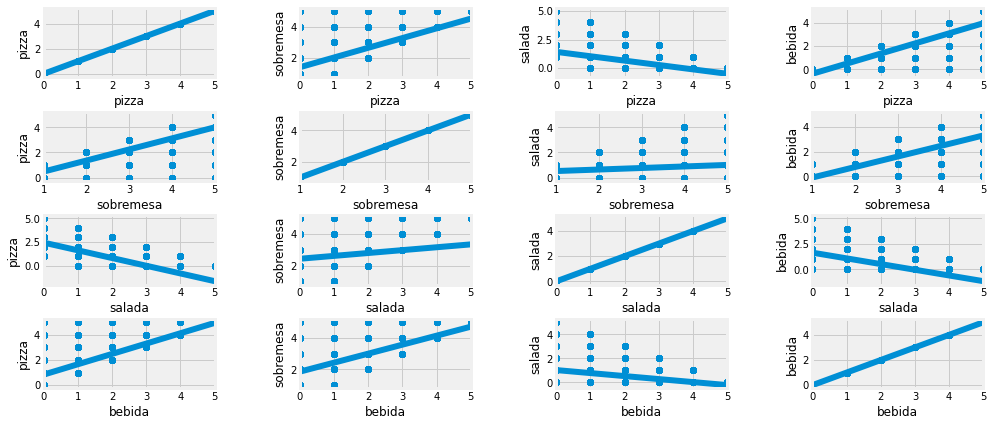

In [67]:
# Relação Entre os Atributos.

# Tamanho da figura
plt.figure(1 , figsize = (15 , 7))

# Inicializa o contador
n = 0 

# Loop pelos atributos
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for y in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_item_pedidos)
        plt.ylabel(y)
plt.show()

### Definindo as variáveis para segmentação

In [68]:
# Criando um dataset já com as variáveis.
df= df_item_pedidos_idx[['index', 'bebida','pizza', 'sobremesa','salada' ]]

In [69]:
df.head()

,index,bebida,pizza,sobremesa,salada
0,0,0,1,1,0
1,1,0,2,2,0
2,2,4,4,5,1
3,3,0,1,1,0
4,4,3,3,3,0


### Iniciando as segmentações

In [70]:
# Definindo o número de atributos.
x1 = df[['pizza', 'sobremesa']].iloc[:, :].values

In [71]:
# lista do WCSS.
wcss_x1 = []

#### Segmentação 1 - Encontrando o valor ideal de clusters.

In [72]:
# Loop para testar os valores de cluster.
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(x1)
    wcss_x1.append(modelo.inertia_)

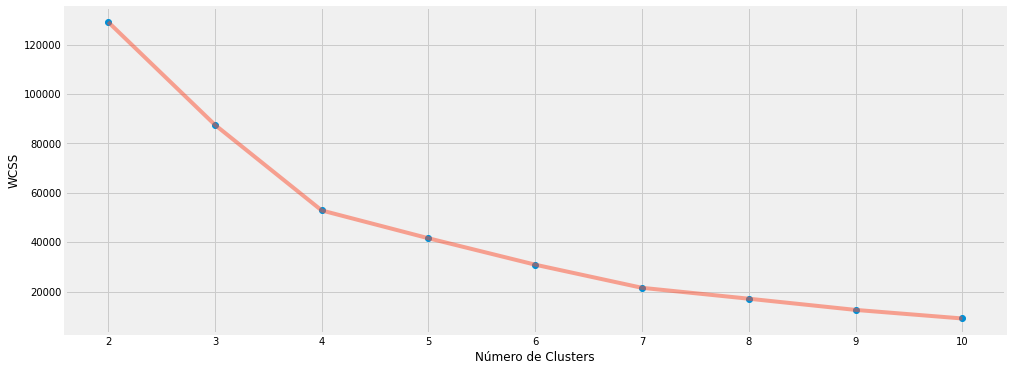

In [73]:
# Plot Curva de Elbow.
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_x1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_x1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

In [74]:
# Segmentação 1 - Construindo e treinando o modelo - Vamos dividir em dois clusters.
# Criação do modelo.
modelo_seg1 = (KMeans(n_clusters = 2,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))


In [75]:
# Treinando o modelo.
modelo_seg1.fit(x1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [76]:
# Extração dos labels.
labels1 = modelo_seg1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [77]:
# Extração dos centróides.
centroids1 = modelo_seg1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

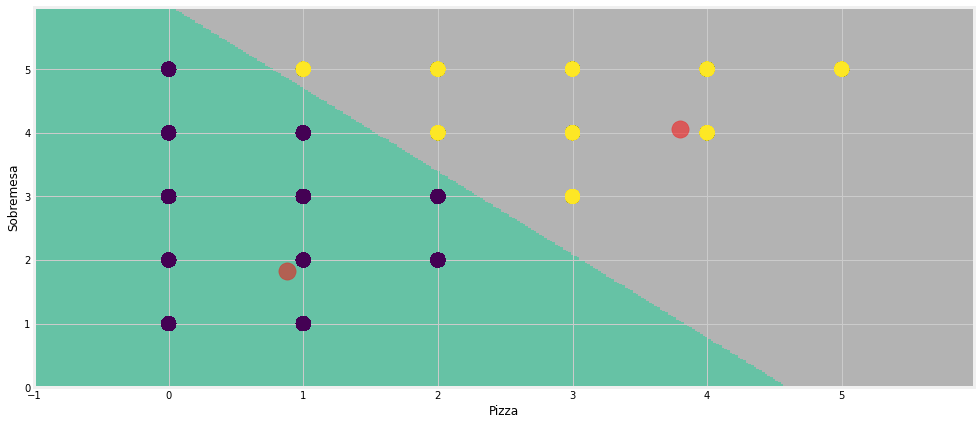

In [79]:
# Segmentação 1 - Visualização e Interpretação dos segmentos.
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'sobremesa', data = df, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

### Insights
 #### Cluster 1 (verde) - Clientes que pedem menos pizza. Todos pedem sobremesa.
 #### Cluster 2 (cinza) - Clientes que pedem mais pizzas. Todos pedem sobremesa em maior quantidade.
#### Podemos sugerir ao time de marketing que faça campanhas oferecendo uma sobremesa grátis ao cliente que comprar mais uma pizza de valor mais alto.

#### Segmentação 2 - Variáveis pizza e salada.

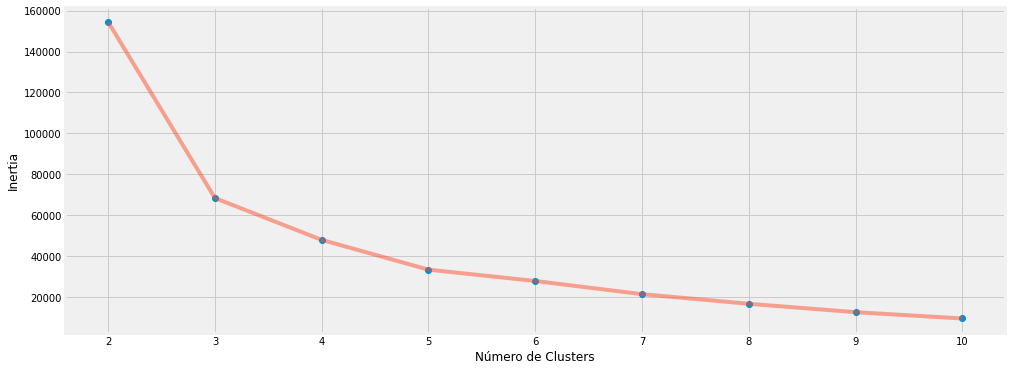

In [89]:

# Usaremos duas variáveis
x1 = df[['pizza' , 'salada']].iloc[: , :].values

# Lista de valores de Inertia (Inertia e WCSS são a mesma coisa)
inertia = []

# Loop para testar os valores de K
for n in range(2 , 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(x1)
    inertia.append(modelo.inertia_)

# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inertia')
plt.show()

In [90]:
# Criação do modelo com 3 clusters.
modelo_seg2 = (KMeans(n_clusters = 3,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )

# Treinamento do modelo
modelo_seg2.fit(x1)

# Labels
labels2 = modelo_seg2.labels_

# Centróides
centroids2 = modelo_seg2.cluster_centers_

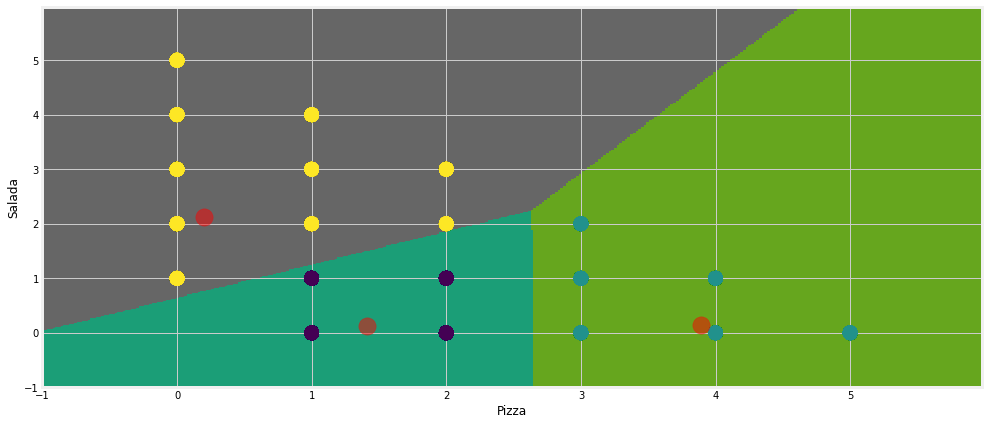

In [91]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg2.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Dark2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'salada', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()

### Insights
#### Cluster 1 (cinza) - clientes que pediram menos pizza e mais salada;
#### Cluster 2 (verde escuro) - clientes que pediram poucas pizzas e poucas saladas;
#### Cluster 3 (verde claro) - clientes que pediram mais pizza e menos salada.
#### O time de marketing poderia criar campanhas para os clientes do cluster 2, pois estes compram pizzas e saladas, ou concentrar os esforços nos clientes que consomem os produtos mais lucrativos

#### Segmentação 3 - Variáveis Pizza e Localidade

In [92]:
# Filtrando o dataframe por colunas. 
df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada', 'localidade']]

,index,bebida,pizza,sobremesa,salada,localidade
0,0,0,1,1,0,9
1,1,0,2,2,0,6
2,2,4,4,5,1,9
3,3,0,1,1,0,6
4,4,3,3,3,0,2
...,...,...,...,...,...,...
99995,99995,4,4,4,0,4
99996,99996,0,1,1,0,2
99997,99997,1,1,1,0,2
99998,99998,0,2,2,0,3


In [93]:
# Criando um novo dataframe.
df2 = df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada', 'localidade']]

In [94]:
# Resumo do dataset.
df2.describe()

,index,bebida,pizza,sobremesa,salada,localidade
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,1.239590,1.857840,2.569210,0.711370,5.004700
std,28867.657797,1.627886,1.588589,1.332084,1.086524,2.544811
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,24999.750000,0.000000,1.000000,1.000000,0.000000,3.000000
50%,49999.500000,0.000000,1.000000,2.000000,0.000000,5.000000
75%,74999.250000,3.000000,3.000000,4.000000,1.000000,7.000000
max,99999.000000,5.000000,5.000000,5.000000,5.000000,9.000000


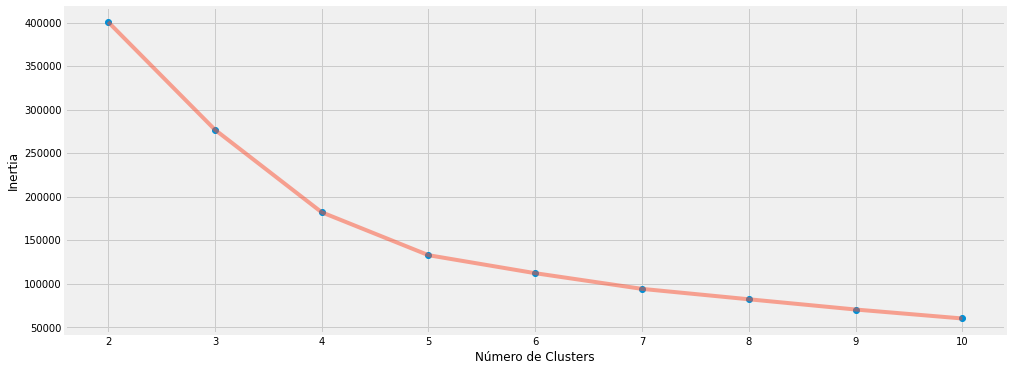

In [95]:
# Usaremos duas variáveis.
x1 = df2[['pizza' , 'localidade']].iloc[: , :].values

# Lista de valores de Inertia (Inertia e WCSS são a mesma coisa)
inertia = []

# Loop para testar os valores de K
for n in range(2 , 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(x1)
    inertia.append(modelo.inertia_)

# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inertia')
plt.show()

In [96]:
# Criação do modelo com 4 clusters.
modelo_seg3 = (KMeans(n_clusters = 4,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )

# Treinamento do modelo
modelo_seg3.fit(x1)

# Labels
labels3 = modelo_seg3.labels_

# Centróides
centroids3 = modelo_seg3.cluster_centers_

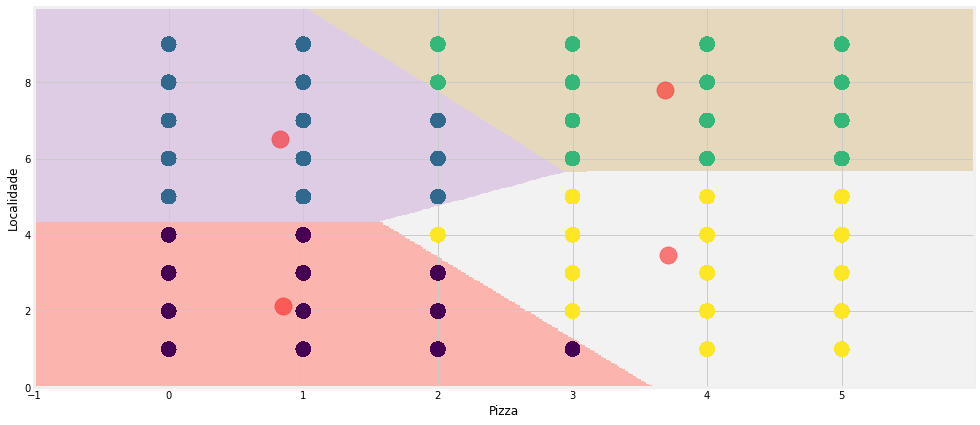

In [97]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg3.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'localidade', data = df2, c = labels3, s = 200 )
plt.scatter(x = centroids3[: , 0], y =  centroids3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Localidade')
plt.show()

### Insights
#### Podemos observar que os clusters da esquerda contém pedidos em todas as localidades, porém com menor número de pizza. Já os clusters da direita contem maior número de pizzas.
#### O time de marketing terá que ivestigar mais a fundo os pedidos de cada cluster afim de compreender em mais detalhes as características destes pedidos e que tipo de oferta ou campanha pode ser feita.

#### FIM
##### Ao fim deste projeto quero agradecer e referenciar a Data Science Academy, por este grande e completo conteúdo ministrado na formação Cientista de Dados. Saiba mais em : datascienceacademy.com.br